In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [16]:
orig_df = pd.read_csv("all_province_full.csv")
orig_df.head()

,province,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN_2017,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,...,2941461.0,1480719,925266.0,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,UDON THANI_2017,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,...,2270322.0,3869166,614978.0,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,LOEI_2017,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,...,1145446.0,2713946,314355.0,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,NONG KHAI_2017,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,...,1281165.0,1133236,212400.0,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,MUKDAHAN_2017,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,...,657777.0,1289197,196184.0,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2


In [17]:
orig_df.describe()

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,231.00000,231.000000,231.000000,2.310000e+02,231.000000,2.310000e+02
mean,2.818182,2.792208,2.350649,2.168831,2.324675,16820.987410,5207.154841,54213.740247,5159.640693,824.904762,...,2.390313e+06,1.891379e+06,5.099046e+05,9652.725289,37932.00000,149990.000000,79.466800,6.920324e+07,100.052307,7.888423e+06
std,1.329210,1.560415,1.206139,1.202200,1.064546,11607.970019,29875.575751,116261.739896,12482.985411,2702.348846,...,5.558296e+06,1.389652e+06,6.315406e+05,11285.301234,91.31035,5294.204625,0.016038,1.871124e+05,0.503472,2.429356e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,2413.932239,0.000000,648.396626,124.349588,26.000000,...,1.725660e+05,1.094060e+05,7.559077e+04,1381.000000,37835.30000,143520.000000,79.447200,6.897133e+07,99.625031,7.550704e+06
25%,2.000000,1.000000,2.000000,1.000000,1.000000,8536.580138,143.466967,4142.994817,517.971199,122.500000,...,5.785240e+05,9.207150e+05,2.414765e+05,4188.648925,37835.30000,143520.000000,79.447200,6.897133e+07,99.625031,7.550704e+06
50%,3.000000,3.000000,2.000000,2.000000,2.000000,13901.405230,395.463234,7879.749099,1129.134655,209.000000,...,9.515510e+05,1.668311e+06,3.909477e+05,7240.358898,37906.60000,149990.000000,79.466800,6.920986e+07,99.774361,8.006265e+06
75%,4.000000,4.000000,3.000000,3.000000,3.000000,20722.628870,1579.532881,30045.849920,2767.505692,561.000000,...,1.793411e+06,2.674452e+06,5.584610e+05,11509.365620,38054.10000,156460.000000,79.486400,6.942852e+07,100.757530,8.108300e+06
max,5.000000,6.000000,5.000000,5.000000,4.000000,77846.992940,281799.846300,622671.598400,83220.164170,25574.000000,...,4.801920e+07,8.386293e+06,5.844446e+06,95660.600000,38054.10000,156460.000000,79.486400,6.942852e+07,100.757530,8.108300e+06


In [18]:
orig_df.columns

Index(['province', 'Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt

In [19]:
df = orig_df[['province', 'Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt', 'percent_import_us', 'population', 'Planted_area ',
       'export']]
df.head()

,province,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN_2017,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,...,2941461.0,1480719,925266.0,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,UDON THANI_2017,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,...,2270322.0,3869166,614978.0,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,LOEI_2017,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,...,1145446.0,2713946,314355.0,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,NONG KHAI_2017,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,...,1281165.0,1133236,212400.0,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,MUKDAHAN_2017,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,...,657777.0,1289197,196184.0,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2


In [20]:
df = df.drop(['province'], axis=1)
df

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,845,...,2941461.0,1480719,9.252660e+05,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,561,...,2270322.0,3869166,6.149780e+05,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,186,...,1145446.0,2713946,3.143550e+05,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,111,...,1281165.0,1133236,2.124000e+05,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,133,...,657777.0,1289197,1.961840e+05,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5,5,2,5,4,2992.031993,7.878722,291876.560800,15972.097790,2537,...,1037246.0,212038,1.488496e+06,17193.613110,38054.1,143520,79.4864,68971331,100.757530,7550704.1
227,5,6,2,4,4,5789.250519,132.666192,185025.287000,9545.870133,2427,...,679015.0,510375,1.164412e+06,10650.580060,38054.1,143520,79.4864,68971331,100.757530,7550704.1
228,4,5,2,4,4,14103.585590,764.224076,236940.839100,8386.459823,2703,...,786698.0,184861,6.963281e+05,16885.595590,38054.1,143520,79.4864,68971331,100.757530,7550704.1
229,4,5,2,4,3,21312.922530,2119.227800,167758.182400,4636.181046,1294,...,1413480.0,920808,3.820312e+05,8359.685620,38054.1,143520,79.4864,68971331,100.757530,7550704.1


In [21]:
df_train, df_test = train_test_split(df, test_size=1/3, shuffle=False)
X_train = df_train[['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt', 'percent_import_us', 'population', 'Planted_area ',
       'export']]
y_train = df_train['Format3']
X_test = df_test[['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt', 'percent_import_us', 'population', 'Planted_area ',
       'export']]
y_test = df_test['Format3']

In [22]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df_train)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.645005,1.417947,0.539540,1.526489,1.577163,0.393698,-0.139977,0.127226,-0.192245,-0.004155,...,0.114393,-0.296818,0.699597,0.563725,1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,0.891044,1.417947,0.539540,0.692874,1.577163,0.206835,-0.044259,-0.341332,-0.292957,-0.105453,...,-0.010176,1.426693,0.185564,0.547092,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.616877,-0.508793,-0.291352,-0.140740,-1.247059,-0.210973,-0.125814,-0.406049,-0.368536,-0.239209,...,-0.218962,0.593083,-0.312457,-0.270932,1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-0.616877,-0.508793,-0.291352,-0.974355,-0.305652,-0.628422,-0.160890,-0.413910,-0.372493,-0.265960,...,-0.193772,-0.547563,-0.481359,-0.535027,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.370837,-1.151040,-0.291352,-0.974355,-1.247059,-0.853465,-0.167852,-0.441637,-0.384089,-0.258113,...,-0.309478,-0.435021,-0.508223,-0.520968,1.0,-1.0,1.0,-1.0,-1.0,-1.0


In [23]:
random_state_val = 1

In [24]:
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

[Text(145.08, 203.85, 'X[20] <= 537208.5\ngini = 0.719\nsamples = 154\nvalue = [38, 66, 22, 14, 14]'),
 Text(122.76, 176.67000000000002, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0, 0, 0]'),
 Text(167.4, 176.67000000000002, 'X[20] <= 1548860.0\ngini = 0.636\nsamples = 120\nvalue = [4, 66, 22, 14, 14]'),
 Text(111.6, 149.49, 'X[8] <= 20227.482\ngini = 0.223\nsamples = 74\nvalue = [4, 65, 3, 2, 0]'),
 Text(89.28, 122.31, 'X[8] <= 61.611\ngini = 0.18\nsamples = 72\nvalue = [4, 65, 3, 0, 0]'),
 Text(66.96000000000001, 95.13, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(111.6, 95.13, 'X[0] <= 59601.855\ngini = 0.135\nsamples = 70\nvalue = [2, 65, 3, 0, 0]'),
 Text(89.28, 67.94999999999999, 'X[20] <= 577852.0\ngini = 0.111\nsamples = 69\nvalue = [2, 65, 2, 0, 0]'),
 Text(44.64, 40.77000000000001, 'X[7] <= 1493.976\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0, 0, 0]'),
 Text(22.32, 13.590000000000003, '\n  (...)  \n'),
 Text(66.96000000000001, 13.590000000000003, '\n  (...)  \n'

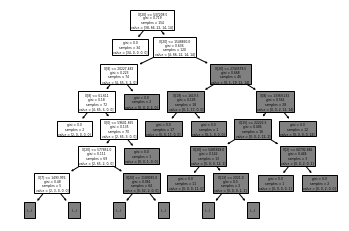

In [25]:
tree.plot_tree(model, max_depth=6) 

In [26]:
y_predicted = model.predict(X_test)
y_predicted

array([3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 2,
       2, 2, 4, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 5, 5, 2, 4, 4, 3, 4,
       5, 2, 2, 2, 2, 2, 1, 5, 2, 4, 3, 3, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       1, 1, 1, 2, 3, 5, 2, 2, 2, 2, 2], dtype=int64)

In [49]:
y_predicted[70]

3

In [29]:
print(confusion_matrix(y_test,y_predicted))

[[19  0  0  0  0]
 [ 0 32  1  0  0]
 [ 0  1  9  1  0]
 [ 0  0  1  6  0]
 [ 0  0  0  1  6]]


In [30]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.97      0.97      0.97        33
           3       0.82      0.82      0.82        11
           4       0.75      0.86      0.80         7
           5       1.00      0.86      0.92         7

    accuracy                           0.94        77
   macro avg       0.91      0.90      0.90        77
weighted avg       0.94      0.94      0.94        77



In [31]:
x_check = pd.DataFrame(columns = ['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt', 'percent_import_us', 'population', 'Planted_area ',
       'export'])
x_check.loc[1] = [19547.5655,3864.499443,15094.45507,1497.257873,561,4566,16201,3576.283013,1635.303048,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.87228,1273,2270322,3869166,614978,15926.73333,37906.6,149990,79.4668,69209858,99.62503052,8006265.2]
x_check

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
1,19547.5655,3864.499443,15094.45507,1497.257873,561.0,4566.0,16201.0,3576.283013,1635.303048,1155.625497,...,2270322.0,3869166.0,614978.0,15926.73333,37906.6,149990.0,79.4668,69209858.0,99.625031,8006265.2


In [32]:
y_predicted = model.predict(x_check)
y_predicted

array([3], dtype=int64)

## only factor form 2.1

In [33]:
df_train, df_test = train_test_split(df, test_size=1/3, shuffle=False)
X_train = df_train[['Accommodation and food service activities',
       'Administrative and support service activities',
       'Mining and quarrying']]
y_train = df_train['Format3']
X_test = df_test[[
       'Accommodation and food service activities',
       'Administrative and support service activities',
       'Mining and quarrying']]
y_test = df_test['Format3']

In [34]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df_train)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.645005,1.417947,0.539540,1.526489,1.577163,0.393698,-0.139977,0.127226,-0.192245,-0.004155,...,0.114393,-0.296818,0.699597,0.563725,1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,0.891044,1.417947,0.539540,0.692874,1.577163,0.206835,-0.044259,-0.341332,-0.292957,-0.105453,...,-0.010176,1.426693,0.185564,0.547092,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.616877,-0.508793,-0.291352,-0.140740,-1.247059,-0.210973,-0.125814,-0.406049,-0.368536,-0.239209,...,-0.218962,0.593083,-0.312457,-0.270932,1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-0.616877,-0.508793,-0.291352,-0.974355,-0.305652,-0.628422,-0.160890,-0.413910,-0.372493,-0.265960,...,-0.193772,-0.547563,-0.481359,-0.535027,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.370837,-1.151040,-0.291352,-0.974355,-1.247059,-0.853465,-0.167852,-0.441637,-0.384089,-0.258113,...,-0.309478,-0.435021,-0.508223,-0.520968,1.0,-1.0,1.0,-1.0,-1.0,-1.0


In [35]:
random_state_val = 1
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)


[Text(115.50600000000001, 203.85, 'X[1] <= 66.5\ngini = 0.719\nsamples = 154\nvalue = [38, 66, 22, 14, 14]'),
 Text(40.176, 176.67000000000002, 'X[1] <= 57.5\ngini = 0.175\nsamples = 31\nvalue = [28, 3, 0, 0, 0]'),
 Text(26.784000000000002, 149.49, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0, 0, 0]'),
 Text(53.568000000000005, 149.49, 'X[1] <= 62.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0, 0, 0]'),
 Text(40.176, 122.31, 'X[2] <= 412.168\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0, 0, 0]'),
 Text(26.784000000000002, 95.13, 'X[2] <= 176.992\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0]'),
 Text(13.392000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(40.176, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(53.568000000000005, 95.13, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(66.96000000000001, 122.31, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]'),
 Text(190.836, 176.67000000000002, 'X[0] 

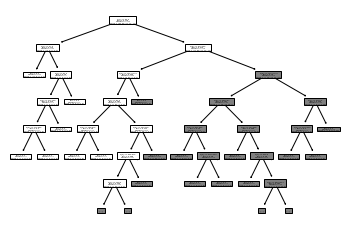

In [50]:
tree.plot_tree(model, max_depth=6) 

In [51]:
y_predicted = model.predict(X_test)
y_predicted

array([4, 3, 2, 2, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 5, 3,
       1, 1, 4, 1, 2, 2, 1, 2, 2, 3, 1, 2, 3, 1, 3, 5, 5, 2, 4, 4, 2, 3,
       5, 2, 2, 3, 2, 2, 1, 5, 2, 4, 3, 2, 3, 2, 2, 2, 2, 5, 4, 2, 2, 1,
       1, 1, 1, 3, 2, 5, 2, 2, 2, 2, 2], dtype=int64)

In [58]:
y_predicted[63]

2

In [53]:
print(confusion_matrix(y_test,y_predicted))

[[16  1  2  0  0]
 [ 7 24  2  0  0]
 [ 0  3  7  1  0]
 [ 0  1  0  5  1]
 [ 0  0  0  1  6]]


In [54]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.83      0.73      0.77        33
           3       0.64      0.64      0.64        11
           4       0.71      0.71      0.71         7
           5       0.86      0.86      0.86         7

    accuracy                           0.75        77
   macro avg       0.75      0.76      0.75        77
weighted avg       0.76      0.75      0.75        77



In [55]:
x_check = pd.DataFrame(columns = ['Accommodation and food service activities',
       'Administrative and support service activities',
       'Mining and quarrying'])
x_check.loc[1] = [1635.303048, 917, 3864.499443]
x_check

,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying
1,1635.303048,917.0,3864.499443


In [45]:
y_predicted = model.predict(x_check)
y_predicted

array([3], dtype=int64)

In [46]:
y_predicted = model.predict(X_train)
y_predicted

array([3, 3, 2, 2, 2, 1, 2, 1, 4, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 2,
       2, 2, 4, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 5, 5, 2, 4, 5, 2, 3,
       5, 2, 2, 3, 2, 2, 1, 5, 2, 4, 3, 3, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       1, 1, 1, 2, 3, 5, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 4, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 2, 2, 2, 4, 1, 1, 2, 1, 2, 3, 1, 1,
       2, 3, 1, 3, 5, 5, 2, 4, 5, 2, 3, 5, 2, 2, 3, 2, 2, 1, 5, 2, 4, 3,
       3, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2, 1, 1, 1, 2, 3, 5, 2, 2, 2, 2, 2],
      dtype=int64)